In [1]:
# Import julia packages
using Pkg
Pkg.add("Pandas")
Pkg.add("PyCall")
Pkg.add("ScikitLearn")
ENV["PYTHON"]=""
Pkg.build("PyCall")
Pkg.add("PyPlot")

   Updating registry at `C:\Users\Arya Prashant\.julia\registries\General`
  Resolving package versions...
  Installed Libiconv_jll ─ v1.16.0+8
  Installed FFTW_jll ───── v3.3.9+8
No Changes to `C:\Users\Arya Prashant\.julia\environments\v1.5\Project.toml`
Updating `C:\Users\Arya Prashant\.julia\environments\v1.5\Manifest.toml`
  [f5851436] ↑ FFTW_jll v3.3.9+7 ⇒ v3.3.9+8
  [94ce4f54] ↑ Libiconv_jll v1.16.0+7 ⇒ v1.16.0+8
  Resolving package versions...
No Changes to `C:\Users\Arya Prashant\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Arya Prashant\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Arya Prashant\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Arya Prashant\.julia\environments\v1.5\Manifest.toml`
   Building Conda ─→ `C:\Users\Arya Prashant\.julia\packages\Conda\tJJuN\deps\build.log`
   Building PyCall → `C:\Users\Arya Prashant\.julia\packages\PyCall\BD546\deps\build.log`
  Resolving package ver

In [2]:
# Pre-compile packages
using Pandas
using ScikitLearn
using PyCall
using PyPlot
ENV["COLUMNS"] = 1000

1000

In [58]:
# import dataset
df = read_csv("C:\\Users\\Arya Prashant\\Julia\\Project 1\\Data.csv")

# visualizing what our dataset looks like
Pandas.head(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [59]:
# check the co-relation between all the columns
corr(df)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [60]:
# The correlation betwqeen all the columns is pretty spread out, making it difficult to choose specific columns for the model

# Checking out the dataset
println(count(df))
println(columns(df))

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

In [61]:
# From the previous step we got to know that the dataset contains 3 types of columns, i.e., mean, se (squared error) and worst.
# The unique labels are namely: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry and fractal_dimension.
# The diagnosis column will be our output column.
unique(df.diagnosis)

2-element Array{Any,1}:
 "M"
 "B"

In [62]:
# The output column conatains two unique values, i.e, M and B.
# M stands for Malignant, i.e., diagnosed with cancer.
# B stands for Benign, i.e., not diagnosed.
# We'll convert this column into numerical.
df = get_dummies(df, "diagnosis")

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_B,diagnosis_M
0,842302,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890,NaN,0,1
1,842517,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902,NaN,0,1
2,84300903,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758,NaN,0,1
3,84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300,NaN,0,1
4,84358402,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678,NaN,0,1
5,843786,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440,NaN,0,1
6,844359,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368,NaN,0,1
7,84458202,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510,NaN,0,1
8,844981,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720,NaN,0,1
9,84501001,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750,NaN,0,1


In [63]:
# drop useless columns
# After the previous step the diagnosis column was replaced by two columns, i.e., diagnosis_M and diagnosis_B.
# We' ll drop one of these columns because we need only one of them.
# Since the Unnamed: 32 column contains only NaN values, we'll drop it.
df = drop(df, ["Unnamed: 32", "diagnosis_B"], axis=1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890,1
1,842517,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902,1
2,84300903,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758,1
3,84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300,1
4,84358402,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678,1
5,843786,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440,1
6,844359,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368,1
7,84458202,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510,1
8,844981,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720,1
9,84501001,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750,1


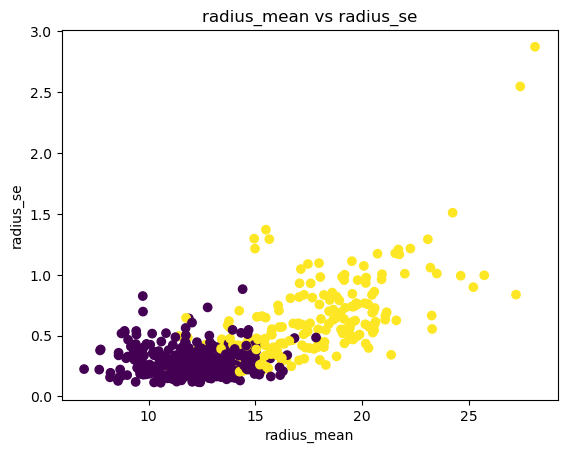

PyObject Text(24.140625000000007, 0.5, 'radius_se')

In [64]:
# Lets check out how are data looks on a graph
# First we'll put different radius columns against each other
scatter(df["radius_mean"], df["radius_se"], c=df["diagnosis_M"])
title("radius_mean vs radius_se")
xlabel("radius_mean")
ylabel("radius_se")

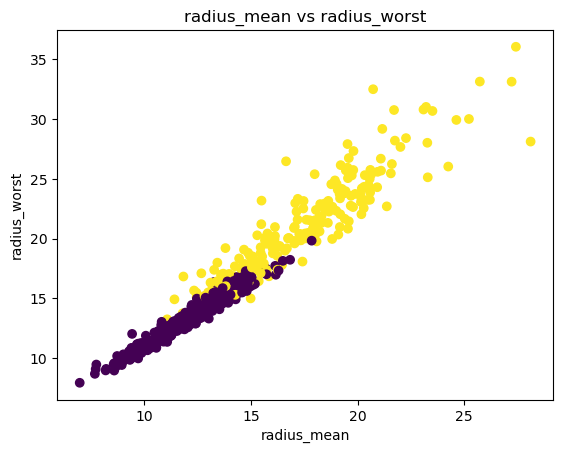

PyObject Text(24.140625000000007, 0.5, 'radius_worst')

In [65]:
scatter(df["radius_mean"], df["radius_worst"], c=df["diagnosis_M"])
title("radius_mean vs radius_worst")
xlabel("radius_mean")
ylabel("radius_worst")

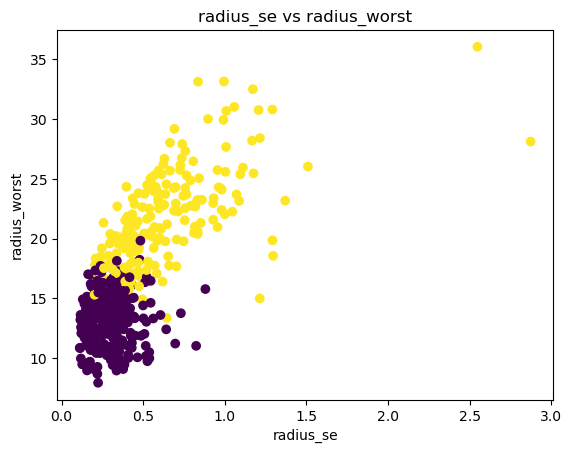

PyObject Text(24.140625000000007, 0.5, 'radius_worst')

In [66]:
scatter(df["radius_se"], df["radius_worst"], c=df["diagnosis_M"])
title("radius_se vs radius_worst")
xlabel("radius_se")
ylabel("radius_worst")

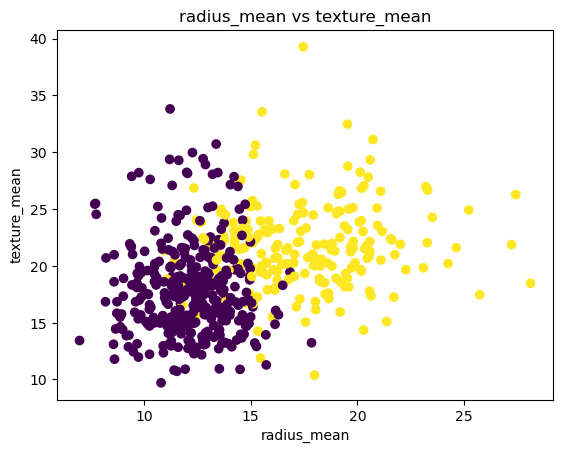

PyObject Text(24.000000000000007, 0.5, 'texture_mean')

In [67]:
# As we can see that different radius columns are pretty well defined clusters of data points.
# Now we'll see how radius_mean column is related to some other columns.
scatter(df["radius_mean"], df["texture_mean"], c=df["diagnosis_M"])
title("radius_mean vs texture_mean")
xlabel("radius_mean")
ylabel("texture_mean")

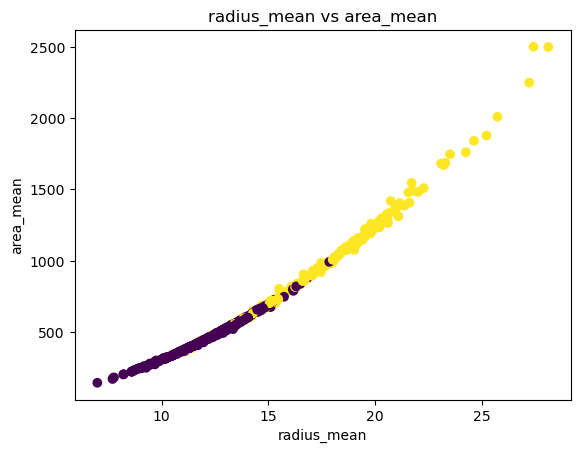

PyObject Text(24.0, 0.5, 'area_mean')

In [68]:
scatter(df["radius_mean"], df["area_mean"], c=df["diagnosis_M"])
title("radius_mean vs area_mean")
xlabel("radius_mean")
ylabel("area_mean")

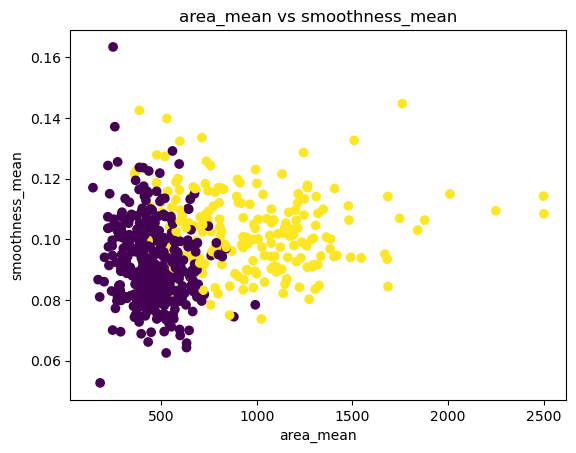

PyObject Text(24.140625000000007, 0.5, 'smoothness_mean')

In [69]:
# Lets check some other graphs as well.
scatter(df["area_mean"], df["smoothness_mean"], c=df["diagnosis_M"])
title("area_mean vs smoothness_mean")
xlabel("area_mean")
ylabel("smoothness_mean")

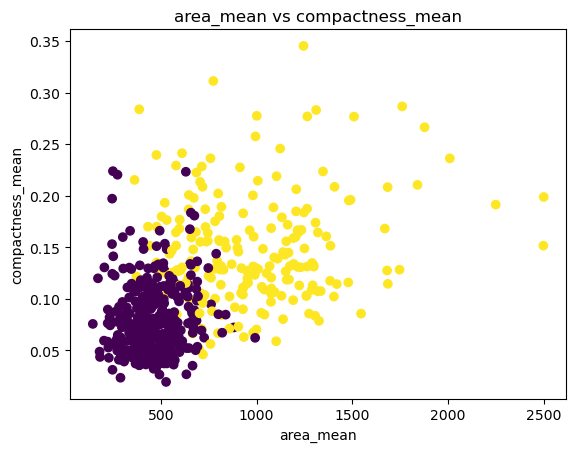

PyObject Text(24.000000000000007, 0.5, 'compactness_mean')

In [70]:
scatter(df["area_mean"], df["compactness_mean"], c=df["diagnosis_M"])
title("area_mean vs compactness_mean")
xlabel("area_mean")
ylabel("compactness_mean")

In [71]:
# Looks like all the columns are pretty well related.
# Since the correlation of the columns can't be used to determine specific columns for training the model in this case.
# We'll divide our dataset into datasets containing only mean columns, only se columns, only worst columns or combination of two types of columns or all columns.
# This way we can create separate models and then check which columns give us the best accuracy

# separting output column
y = df["diagnosis_M"]

# all columns
x = drop(df, ["diagnosis_M", "id"], axis = 1)

# only mean columns
x1 = drop(df, ["radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "diagnosis_M", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst", "id"], axis=1)

# only se columns
x2 = drop(df, ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "diagnosis_M", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst", "id"], axis=1)

# only worst columns
x3 = drop(df, ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "diagnosis_M", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "id"], axis=1)

# se columns removed
x4 = drop(df, ["radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "diagnosis_M", "id"], axis=1)

# worst columns removed
x5 = drop(df, ["diagnosis_M", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst", "id"], axis=1)

# mean columns removed
x6 = drop(df, ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "diagnosis_M", "id"], axis=1)

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
5,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
7,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
8,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
9,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750


In [72]:
#import train_test_split 
@sk_import model_selection: train_test_split
#splitting training and testing data
@sk_import preprocessing: StandardScaler

# all columns
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# only mean columns
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.20, random_state=0)

# only se columns
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.20, random_state=0)

# only worst columns
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.20, random_state=0)

# se columns removed
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y, test_size=0.20, random_state=0)

# worst columns removed
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y, test_size=0.20, random_state=0)

# mean columns removed
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y, test_size=0.20, random_state=0)

# Scaling down the values for better training
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

x1_train = StandardScaler().fit_transform(x1_train)
x1_test = StandardScaler().fit_transform(x1_test)

x2_train = StandardScaler().fit_transform(x2_train)
x2_test = StandardScaler().fit_transform(x2_test)

x3_train = StandardScaler().fit_transform(x3_train)
x3_test = StandardScaler().fit_transform(x3_test)

x4_train = StandardScaler().fit_transform(x4_train)
x4_test = StandardScaler().fit_transform(x4_test)

x5_train = StandardScaler().fit_transform(x5_train)
x5_test = StandardScaler().fit_transform(x5_test)

x6_train = StandardScaler().fit_transform(x6_train)
x6_test = StandardScaler().fit_transform(x6_test)

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore C:\Users\Arya Prashant\.julia\packages\ScikitLearn\Kn82b\src\Skcore.jl:169


114×20 Array{Float64,2}:
 -0.101822   -0.534315   0.0328666   -0.195323   -0.498922    -0.232034      0.0362028   0.132797    -0.416959   -0.0462215   0.0192608   0.544941     0.157574   -0.0681062   1.07443     0.704462    0.914505    1.33439     1.22101    1.32978
 -0.839679    0.179163  -0.880021    -0.652618   -0.39953     -0.985862     -0.706788   -0.834233    -0.836229   -0.834835   -0.428804    1.27098     -0.519599   -0.494761   -0.131456   -0.911695   -0.632539   -0.819527   -0.775419  -0.945704
 -0.81619    -1.00333   -0.730183    -0.605155   -0.660925    -0.926045     -0.93202    -0.229366    -1.04235    -0.734855   -0.307      -1.09937     -0.358382   -0.381793   -1.21041    -0.938312   -0.950607   -0.491205   -1.31433   -0.986961
 -0.752205   -0.979346  -0.70196     -0.567923   -1.12925     -0.691534     -0.871685   -1.0038      -1.12199    -0.788105   -0.0220655  -0.154091    -0.0731759  -0.117933   -1.5891     -0.27287    -0.559683   -0.593073   -0.439472  -0.476009
 -0.

In [73]:
# Lets try one more thing. We'll use multiple classification algorithms and find out which algorithm and set of columns give the best accuracy.

#building the logistic regression model
@sk_import linear_model: LogisticRegression
model_lr = LogisticRegression().fit(x_train, y_train)
model1_lr = LogisticRegression().fit(x1_train, y1_train)
model2_lr = LogisticRegression().fit(x2_train, y2_train)
model3_lr = LogisticRegression().fit(x3_train, y3_train)
model4_lr = LogisticRegression().fit(x4_train, y4_train)
model5_lr = LogisticRegression().fit(x5_train, y5_train)
model6_lr = LogisticRegression().fit(x6_train, y6_train)

#building the knn model
@sk_import neighbors: KNeighborsClassifier
model_knn = KNeighborsClassifier(p=2).fit(x_train, y_train)
model1_knn = KNeighborsClassifier(p=2).fit(x1_train, y1_train)
model2_knn = KNeighborsClassifier(p=2).fit(x2_train, y2_train)
model3_knn = KNeighborsClassifier(p=2).fit(x3_train, y3_train)
model4_knn = KNeighborsClassifier(p=2).fit(x4_train, y4_train)
model5_knn = KNeighborsClassifier(p=2).fit(x5_train, y5_train)
model6_knn = KNeighborsClassifier(p=2).fit(x6_train, y6_train)

#building the random forest model
@sk_import ensemble: RandomForestClassifier
model_rfc = RandomForestClassifier().fit(x_train, y_train)
model1_rfc = RandomForestClassifier().fit(x1_train, y1_train)
model2_rfc = RandomForestClassifier().fit(x2_train, y2_train)
model3_rfc = RandomForestClassifier().fit(x3_train, y3_train)
model4_rfc = RandomForestClassifier().fit(x4_train, y4_train)
model5_rfc = RandomForestClassifier().fit(x5_train, y5_train)
model6_rfc = RandomForestClassifier().fit(x6_train, y6_train)

#building the naive bayes model
@sk_import naive_bayes: GaussianNB
model_nb = GaussianNB().fit(x_train, y_train)
model1_nb = GaussianNB().fit(x1_train, y1_train)
model2_nb = GaussianNB().fit(x2_train, y2_train)
model3_nb = GaussianNB().fit(x3_train, y3_train)
model4_nb = GaussianNB().fit(x4_train, y4_train)
model5_nb = GaussianNB().fit(x5_train, y5_train)
model6_nb = GaussianNB().fit(x6_train, y6_train)

#building the decision tree model
@sk_import tree: DecisionTreeClassifier
model_dt = DecisionTreeClassifier().fit(x_train, y_train)
model1_dt = DecisionTreeClassifier().fit(x1_train, y1_train)
model2_dt = DecisionTreeClassifier().fit(x2_train, y2_train)
model3_dt = DecisionTreeClassifier().fit(x3_train, y3_train)
model4_dt = DecisionTreeClassifier().fit(x4_train, y4_train)
model5_dt = DecisionTreeClassifier().fit(x5_train, y5_train)
model6_dt = DecisionTreeClassifier().fit(x6_train, y6_train)

PyObject DecisionTreeClassifier()

In [74]:
#predicting using the test values in all the models

# logistic regression
pred_lr = ScikitLearn.predict(model_lr, x_test)
pred1_lr = ScikitLearn.predict(model1_lr, x1_test)
pred2_lr = ScikitLearn.predict(model2_lr, x2_test)
pred3_lr = ScikitLearn.predict(model3_lr, x3_test)
pred4_lr = ScikitLearn.predict(model4_lr, x4_test)
pred5_lr = ScikitLearn.predict(model5_lr, x5_test)
pred6_lr = ScikitLearn.predict(model6_lr, x6_test)

# knn
pred_knn = model_knn.predict(x_test)
pred1_knn = model1_knn.predict(x1_test)
pred2_knn = model2_knn.predict(x2_test)
pred3_knn = model3_knn.predict(x3_test)
pred4_knn = model4_knn.predict(x4_test)
pred5_knn = model5_knn.predict(x5_test)
pred6_knn = model6_knn.predict(x6_test)

# random forest classifier
pred_rfc = model_rfc.predict(x_test)
pred1_rfc = model1_rfc.predict(x1_test)
pred2_rfc = model2_rfc.predict(x2_test)
pred3_rfc = model3_rfc.predict(x3_test)
pred4_rfc = model4_rfc.predict(x4_test)
pred5_rfc = model5_rfc.predict(x5_test)
pred6_rfc = model6_rfc.predict(x6_test)

# naive bayes
pred_nb = model_nb.predict(x_test)
pred1_nb = model1_nb.predict(x1_test)
pred2_nb = model2_nb.predict(x2_test)
pred3_nb = model3_nb.predict(x3_test)
pred4_nb = model4_nb.predict(x4_test)
pred5_nb = model5_nb.predict(x5_test)
pred6_nb = model6_nb.predict(x6_test)

# decision tree
pred_dt = model_dt.predict(x_test)
pred1_dt = model1_dt.predict(x1_test)
pred2_dt = model2_dt.predict(x2_test)
pred3_dt = model3_dt.predict(x3_test)
pred4_dt = model4_dt.predict(x4_test)
pred5_dt = model5_dt.predict(x5_test)
pred6_dt = model6_dt.predict(x6_test)

114-element Array{UInt8,1}:
 0x01
 0x00
 0x00
 0x00
 0x00
 0x00
 0x00
 0x00
 0x00
 0x00
 0x00
 0x00
 0x00
    ⋮
 0x00
 0x00
 0x01
 0x00
 0x01
 0x00
 0x01
 0x01
 0x00
 0x01
 0x01
 0x00

In [76]:
#importing r2_score for evaluation of model
@sk_import metrics: (confusion_matrix, f1_score, accuracy_score, r2_score)

#evaluating the model by using actual and predicted output values.

println("Results of logistic regression models :-\n")
println("All columns included :        ", accuracy_score(y_test, pred_lr))
println("Only mean columns included :  ", accuracy_score(y1_test, pred1_lr))
println("Only se columns included :    ", accuracy_score(y2_test, pred2_lr))
println("Only worst columns included : ", accuracy_score(y3_test, pred3_lr))
println("se columns removed :          ", accuracy_score(y4_test, pred4_lr))
println("worst columns removed :       ", accuracy_score(y5_test, pred5_lr))
println("mean columns removed :        ", accuracy_score(y6_test, pred6_lr))
print("\n\n------------------------------\n\n\n")

println("Results of knn models :-\n")
println("All columns included :        ", accuracy_score(y_test, pred_knn))
println("Only mean columns included :  ", accuracy_score(y1_test, pred1_knn))
println("Only se columns included :    ", accuracy_score(y2_test, pred2_knn))
println("Only worst columns included : ", accuracy_score(y3_test, pred3_knn))
println("se columns removed :          ", accuracy_score(y4_test, pred4_knn))
println("worst columns removed :       ", accuracy_score(y5_test, pred5_knn))
println("mean columns removed :        ", accuracy_score(y6_test, pred6_knn))
print("\n\n------------------------------\n\n\n")

println("Results of random forest classifier models :-\n")
println("All columns included :        ", accuracy_score(y_test, pred_rfc))
println("Only mean columns included :  ", accuracy_score(y1_test, pred1_rfc))
println("Only se columns included :    ", accuracy_score(y2_test, pred2_rfc))
println("Only worst columns included : ", accuracy_score(y3_test, pred3_rfc))
println("se columns removed :          ", accuracy_score(y4_test, pred4_rfc))
println("worst columns removed :       ", accuracy_score(y5_test, pred5_rfc))
println("mean columns removed :        ", accuracy_score(y6_test, pred6_rfc))
print("\n\n------------------------------\n\n\n")

println("Results of naive bayes models :-\n")
println("All columns included :        ", accuracy_score(y_test, pred_nb))
println("Only mean columns included :  ", accuracy_score(y1_test, pred1_nb))
println("Only se columns included :    ", accuracy_score(y2_test, pred2_nb))
println("Only worst columns included : ", accuracy_score(y3_test, pred3_nb))
println("se columns removed :          ", accuracy_score(y4_test, pred4_nb))
println("worst columns removed :       ", accuracy_score(y5_test, pred5_nb))
println("mean columns removed :        ", accuracy_score(y6_test, pred6_nb))
print("\n\n------------------------------\n\n\n")

println("Results of decision tree models :-\n")
println("All columns included :        ", accuracy_score(y_test, pred_dt))
println("Only mean columns included :  ", accuracy_score(y1_test, pred1_dt))
println("Only se columns included :    ", accuracy_score(y2_test, pred2_dt))
println("Only worst columns included : ", accuracy_score(y3_test, pred3_dt))
println("se columns removed :          ", accuracy_score(y4_test, pred4_dt))
println("worst columns removed :       ", accuracy_score(y5_test, pred5_dt))
println("mean columns removed :        ", accuracy_score(y6_test, pred6_dt))

Results of logistic regression models :-

All columns included :        0.956140350877193
Only mean columns included :  0.9473684210526315
Only se columns included :    0.8508771929824561
Only worst columns included : 0.9824561403508771
se columns removed :          0.9736842105263158
worst columns removed :       0.9210526315789473
mean columns removed :        0.956140350877193


------------------------------


Results of knn models :-

All columns included :        0.9649122807017544
Only mean columns included :  0.9035087719298246
Only se columns included :    0.8421052631578947
Only worst columns included : 0.9736842105263158
se columns removed :          0.9649122807017544
worst columns removed :       0.9122807017543859
mean columns removed :        0.9473684210526315


------------------------------


Results of random forest classifier models :-

All columns included :        0.956140350877193
Only mean columns included :  0.9649122807017544
Only se columns included :    0.87

In [98]:
# The results show that logistic regression model with only worst columns included and random forest classifier model with se columns removed have the best accuracy, i.e., 98.24 %.
# Since the logistic regression model requires only worst columns (less number of columns), so we'll use it to do further predictions.
column_names = ["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]

10-element Array{String,1}:
 "radius_worst"
 "texture_worst"
 "perimeter_worst"
 "area_worst"
 "smoothness_worst"
 "compactness_worst"
 "concavity_worst"
 "concave points_worst"
 "symmetry_worst"
 "fractal_dimension_worst"

In [132]:
# get the inputs for all the required labels
inputs = []
for i in 1:10
    println("Enter the value of ", column_names[i], " in the range (", maximum(x3_train[: , i]), " to ", minimum(x3_train[: , i]), "): ")
    push!(inputs, parse(Float64, readline()))
end
reshape(inputs, 1, :)

Enter the value of radius_worst in the range (4.049782874594595 to -1.7043595156901263): 
stdin> 1
Enter the value of texture_worst in the range (3.938554835590165 to -2.218397844650981): 
stdin> 2
Enter the value of perimeter_worst in the range (4.261315208754766 to -1.6736076516824507): 
stdin> 4
Enter the value of area_worst in the range (5.758096248247508 to -1.1882011273947837): 
stdin> 4
Enter the value of smoothness_worst in the range (3.988373550530985 to -2.7118067553493836): 
stdin> 2
Enter the value of compactness_worst in the range (5.270908711535973 to -1.4683558824383902): 
stdin> 4
Enter the value of concavity_worst in the range (4.936909789849629 to -1.341360042369082): 
stdin> 3
Enter the value of concave points_worst in the range (2.69509632919887 to -1.7540143286550058): 
stdin> 2
Enter the value of symmetry_worst in the range (5.934051501855849 to -2.1282775783392407): 
stdin> 5
Enter the value of fractal_dimension_worst in the range (6.968987300329089 to -1.5989027

1×10 Array{Any,2}:
 1.0  2.0  4.0  4.0  2.0  4.0  3.0  2.0  5.0  6.0

In [135]:
# predict the result and print it
result = model3_lr.predict([inputs])
if result[1] == 1
    print("Malignant!")
else
    print("Benign!")
end

Malignant!